# Lab #5

In [ ]:
import torch
import torchvision.transforms.functional as TF
from PIL import Image, ImageOps

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

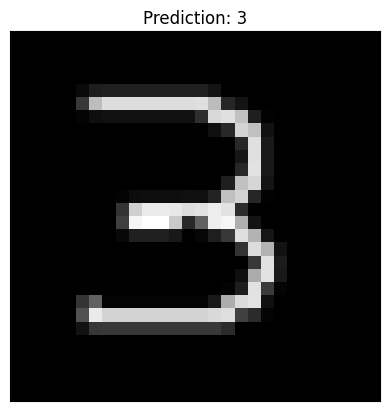

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = Net()

model.load_state_dict(torch.load('model.pth'))
model.eval()


def import_image(image_path, invert=True):
    image = Image.open(image_path).convert('L')

    # Invert image if background is white and foreground is black
    if invert:
        image = ImageOps.invert(image) 
    
    image = image.resize((28, 28))
    return image


def predict_digit(image):
    image = TF.to_tensor(image)
    image = TF.normalize(image, (0.5,), (0.5,))
    image = image.unsqueeze(0)  # Add batch dimension
    output = model(image)
    _, predicted = torch.max(output.data, 1)
    return predicted.item()


# Example usage
image = import_image('data/test.png', invert=True)
predicted_digit = predict_digit(image)

plt.imshow(image, cmap='gray', interpolation='none')
plt.title("Prediction: {}".format(predicted_digit))
plt.xticks([])
plt.yticks([])
plt.show()